In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection & Processing
calories = pd.read_csv('/content/calories.csv')
exercise_data = pd.read_csv('/content/exercise.csv')

# Combining the two Dataframes
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

# Feature Engineering
calories_data['BMI'] = calories_data['Weight'] / ((calories_data['Height']/100) ** 2)
calories_data['Heart_Rate_Range'] = calories_data['Heart_Rate'].apply(lambda x: 'Normal' if x <= 100 else 'High')
calories_data = pd.get_dummies(calories_data, columns=['Heart_Rate_Range'], drop_first=True)
calories_data['Weight_Squared'] = calories_data['Weight'] ** 2
calories_data['Height_Squared'] = calories_data['Height'] ** 2

# Data Preprocessing
calories_data['Gender'] = calories_data['Gender'].map({'male': 0, 'female': 1})

# Separating features and Target
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Model Training (XGBoost with Hyperparameter Tuning)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3]
}
model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(X_train, Y_train)

# Best Model
best_model = grid_search.best_estimator_

# Evaluation
test_data_prediction = best_model.predict(X_test)
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
r2 = metrics.r2_score(Y_test, test_data_prediction)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))

print(f"MAE: {mae}, R2: {r2}, RMSE: {rmse}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight

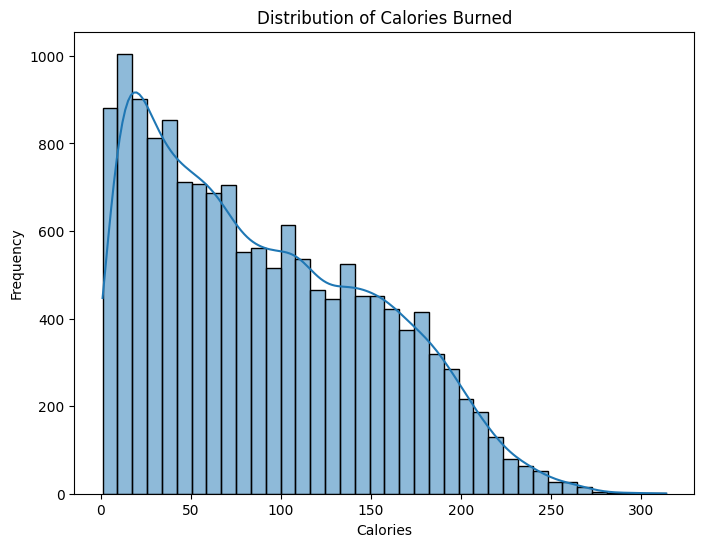

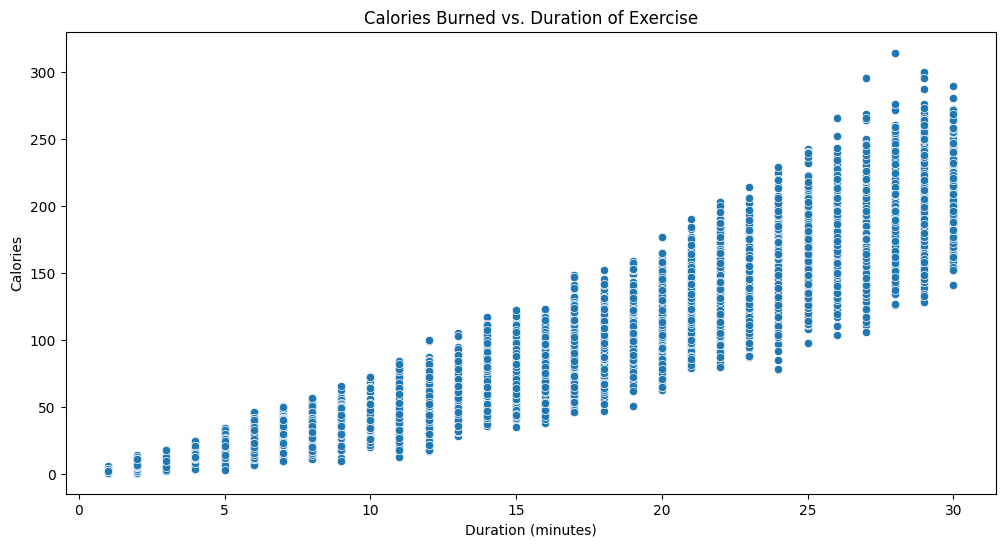

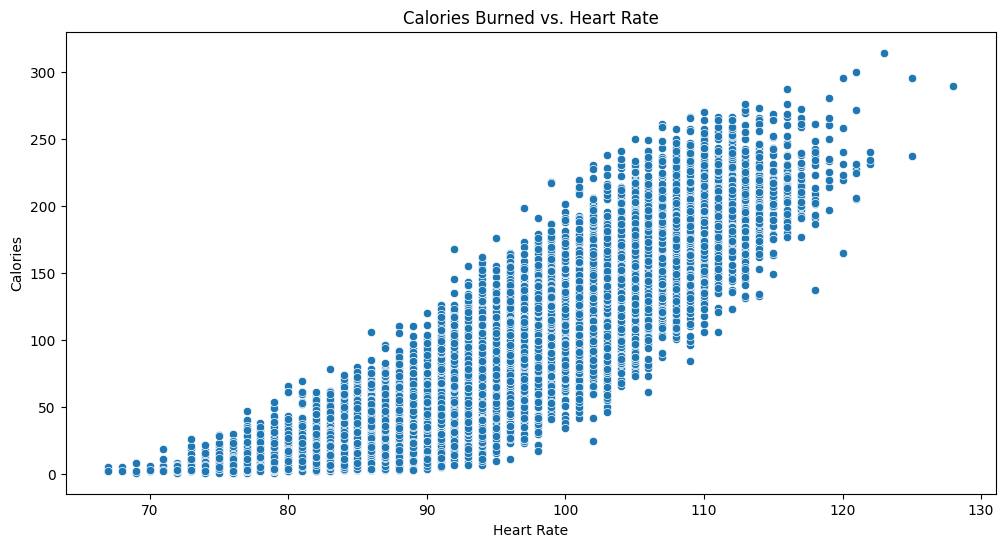

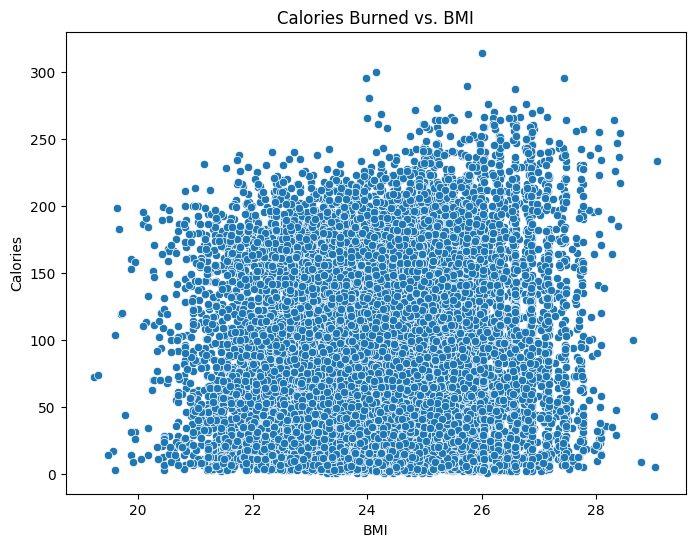

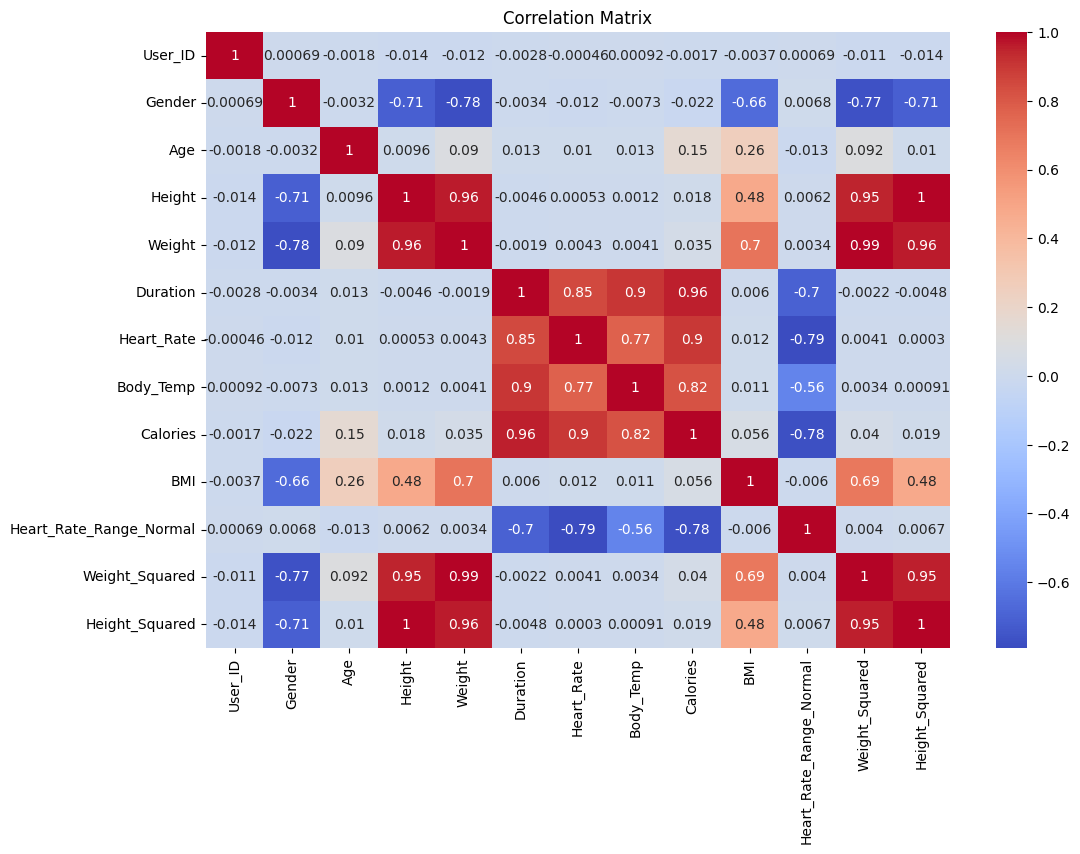

In [ ]:
# prompt: now based on the above code and the dataset give a distinct and accurately suitable visualization

# Visualize the distribution of Calories burned
plt.figure(figsize=(8, 6))
sns.histplot(calories_data['Calories'], kde=True)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


# Visualize the relationship between Calories and other features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Duration', y='Calories', data=calories_data)
plt.title('Calories Burned vs. Duration of Exercise')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories')
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(x='Heart_Rate', y='Calories', data=calories_data)
plt.title('Calories Burned vs. Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Calories')
plt.show()


# Visualize the relationship between Calories and BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Calories', data=calories_data)
plt.title('Calories Burned vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Calories')
plt.show()


# Correlation matrix heatmap
correlation_matrix = calories_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


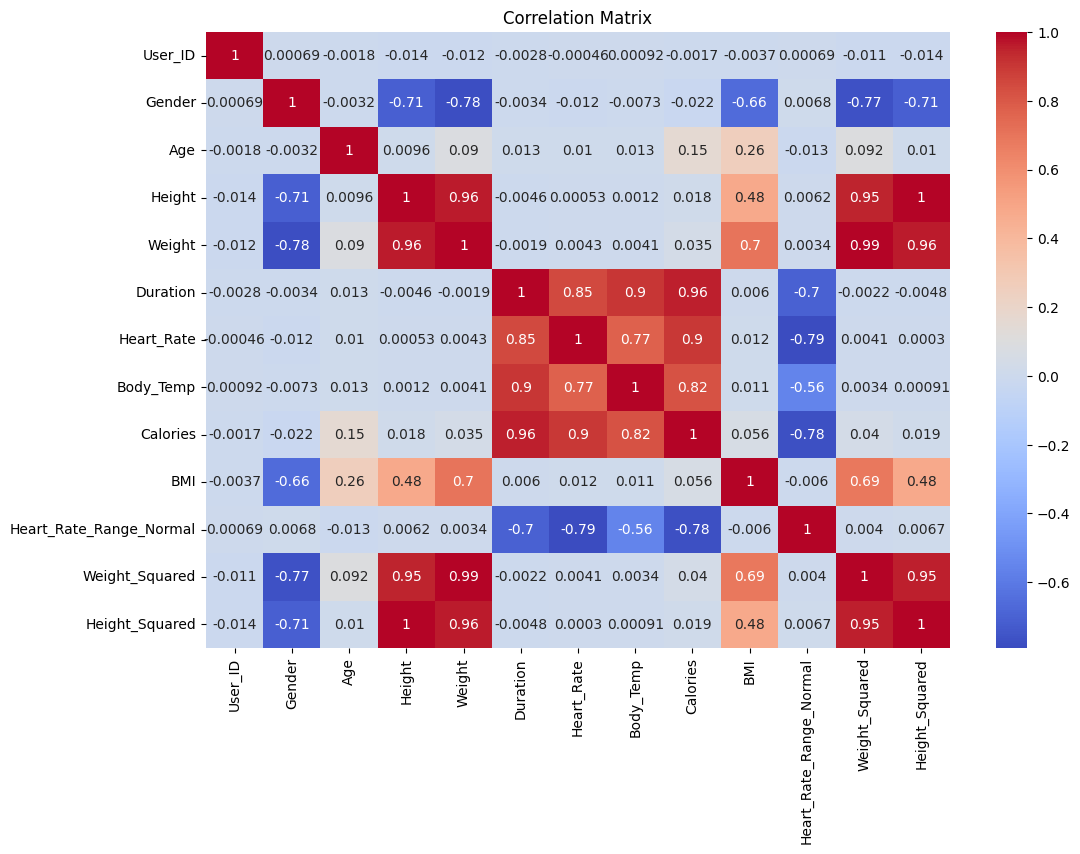


Valuable Insights from Correlation Matrix:
Features highly correlated with Calories: ['Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
Features negatively correlated with Calories: ['Heart_Rate_Range_Normal']
High correlation between Weight and Height
High correlation between Heart_Rate and Duration
High correlation between Body_Temp and Duration
High correlation between Calories and Duration
High correlation between Calories and Heart_Rate
High correlation between Calories and Body_Temp
High correlation between Weight_Squared and Height
High correlation between Weight_Squared and Weight
High correlation between Height_Squared and Height
High correlation between Height_Squared and Weight
High correlation between Height_Squared and Weight_Squared


In [ ]:
# prompt: print the valuable insights we get from correlation matrix

# ... (Your existing code)

# Correlation matrix heatmap
correlation_matrix = calories_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Print valuable insights from the correlation matrix
print("\nValuable Insights from Correlation Matrix:")

# Find features highly correlated with 'Calories'
high_corr_features = correlation_matrix['Calories'][correlation_matrix['Calories'] > 0.5].index.tolist()
print(f"Features highly correlated with Calories: {high_corr_features}")

# Find features negatively correlated with 'Calories'
negative_corr_features = correlation_matrix['Calories'][correlation_matrix['Calories'] < -0.5].index.tolist()
print(f"Features negatively correlated with Calories: {negative_corr_features}")


# Identify multicollinearity (high correlation between independent variables)
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j]) > 0.8:
      print(f"High correlation between {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}")

